In [50]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

random_state = 1

In [51]:
skincare = pd.read_csv(r"C:\Users\gdevi\Desktop\final_dataset.csv", sep=",",encoding='latin-1')
skincare

,product_name,website,country,category,subcategory,title-href,price,brand,ingredients,form,type,color,size,rating,noofratings
0,"Carlton London Incense Eau da parfum, Premium ...",Flipkart,India,body,perfume,https://www.amazon.in/Carlton-London-Limited-I...,599.0,Carlton London,NaN,aerosol,NaN,"Top Note: Orange Blossom, Blackberry | Heart N...",100,3.9,19
1,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,https://www.amazon.in/CHARLENE-SPRAY-MIST-PERF...,149.0,Charlene,NaN,aerosol,NaN,Unit count type:,30,4.4,"4,031"
2,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,https://www.amazon.in/CHARLENE-SPRAY-MIST-PERF...,298.0,Charlene,NaN,aerosol,NaN,Unit count type:,30,4.4,"4,072"
3,DENVER Black Code Perfume - 60 | Eau de Parfum...,Flipkart,India,body,perfume,https://www.amazon.in/DENVER-Black-Code-Perfum...,245.0,Denver,NaN,aerosol,NaN,Long-Lasting Scent,60,4.2,61
4,Denver Hamilton Perfume - 100 | Long Lasting P...,Flipkart,India,body,perfume,https://www.amazon.in/Denver-Perfume-Hamilton-...,422.0,Denver,NaN,aerosol,NaN,Long-Lasting Scent,100,4.3,342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12610,Bright Future - Smoothing & Brightening Concea...,Sephora,India,face,concealer,https://sephora.nnnow.com/mac-cosmetics-prep--...,1900.0,MAC Cosmetics,"Water\Aqua\Eau, Glycerin, Butylene Glycol, Toc...",cream,"Combination, Dry, Oily, Normal",Pinklite,100,3.15,14
12611,Bright Future - Smoothing & Brightening Concea...,Sephora,India,face,concealer,https://sephora.nnnow.com/mac-cosmetics-prep--...,2150.0,MAC Cosmetics,"Water\Aqua\Eau, Cyclopentasiloxane, Dimethicon...",cream,"Combination, Dry, Oily, Normal",No colour,100,3.13,13
12612,Starlaa Rosy Bronze Blush Mini,Sephora,India,face,blush,https://sephora.nnnow.com/klara-cosmetics-wome...,3040.0,Klara Cosmetics,"Talc, Ethylhexyl Palmitate, Octyldodecanol, Sy...",powder,"Combination, Oily, Normal, Dry",Selfie Queen,110,4.03,96
12613,Terra Golden Brick Red Blush Travel Size Mini,Sephora,India,face,blush,https://sephora.nnnow.com/clinique-women-clini...,2950.0,CLINIQUE,"Water\Aqua\Eau, Dimethicone, Isododecane, Buty...",liquid,"Combination, Dry, Oily, Normal",All,115,3.15,15


In [52]:
skincare['price'] = skincare['price'].astype(float)
skincare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12615 entries, 0 to 12614
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  12615 non-null  object 
 1   website       12615 non-null  object 
 2   country       12615 non-null  object 
 3   category      12615 non-null  object 
 4   subcategory   12615 non-null  object 
 5   title-href    12615 non-null  object 
 6   price         12298 non-null  float64
 7   brand         12615 non-null  object 
 8   ingredients   6600 non-null   object 
 9   form          12615 non-null  object 
 10  type          9934 non-null   object 
 11  color         10626 non-null  object 
 12  size          9449 non-null   object 
 13  rating        10548 non-null  object 
 14  noofratings   12156 non-null  object 
dtypes: float64(1), object(14)
memory usage: 1.4+ MB


In [53]:
skincare.isnull().sum()

product_name       0
website            0
country            0
category           0
subcategory        0
title-href         0
price            317
brand              0
ingredients     6015
form               0
type            2681
color           1989
size            3166
rating          2067
noofratings      459
dtype: int64

In [54]:
skincare['subcategory'].unique()

array(['perfume', 'bodywash', 'sunscreen', 'moisturizer', 'soap',
       'mascara', 'eyeshadow', 'eyeliner', 'primer', 'eye primer',
       'eyebrow', 'serum', 'eyelashes', 'foundation', 'shampoo',
       'hairmask', 'conditioner', 'hairstyling', 'oil', 'dry shampoo',
       'lipliner', 'lipgloss', 'lipstick', 'lipbalm', 'lipstain',
       'cleanser', 'eye treatment', 'mask', 'toner', 'face wash', 'spray',
       'blush', 'concealer', 'powder', 'highlighter', 'face oil'],
      dtype=object)

In [55]:
skincare['form'].unique()

array(['aerosol', 'cream', 'foam', 'gel', 'liquid', 'lotion', 'solid',
       'other', 'capsule', 'crayon', 'gaze', 'pen', 'pencil', 'powder',
       'stick', 'strip', 'dry', 'mask', 'paste', 'mousse', 'tube',
       'wipes', 'cushion', 'balm', 'serum'], dtype=object)

In [56]:
skincare.brand.unique()

array(['Carlton London', 'Charlene', 'Denver', ..., 'Zuii Organic',
       'BLUSH18', 'Dermablend'], dtype=object)

In [57]:
print(type(skincare['price']))

<class 'pandas.core.series.Series'>


In [59]:
# calculate the mean price of non-null values
mean_price = skincare['price'].mean()
# fill the null values with the mean price
skincare['price'].fillna(mean_price, inplace=True)

In [60]:
skincare['price'].isnull().sum()

0

In [61]:
print(skincare['price'].describe())

count    12615.000000
mean      2281.180935
std       3118.747543
min          1.700000
25%        499.000000
50%       1390.000000
75%       2799.500000
max      94099.000000
Name: price, dtype: float64


In [62]:
def price_to_class(x):
    if x <= 499.000000:
        x = 0
    elif (x > 499.000000) and (x <= 1225.800000):
        x = 1
    elif (x > 1225.800000) and (x <= 2799.500000):
          x = 2
    elif x > 2799.500000: 
        x = 3
    return x

In [63]:
skincare['price'] = skincare["price"].apply(price_to_class)
# convert the price to 1 for 'expensive' if over the 50 percentile, and to 0 for 'cheap' if under the 50 percentile
skincare['price'].value_counts()

2    3440
0    3382
3    3154
1    2639
Name: price, dtype: int64

In [64]:
skincare['price']

0        1
1        0
2        0
3        0
4        0
        ..
12610    2
12611    2
12612    3
12613    3
12614    3
Name: price, Length: 12615, dtype: int64

In [65]:
y = np.array(skincare['price'])
y.shape
# prepare labels
print(y)

[1 0 0 ... 3 3 3]


In [37]:
#brand , product type - multiclass logistic reg

In [66]:
def tokenizer(x) -> list: 
    x = x.replace('(', '')
    x = x.replace(')', '')
    x = x.replace("\xa0", " ")
    x = x.replace(".", ",")
    x = x.replace(" & ", ", ")
    x = re.split(', ', x)
#     for item in x: 
#         if (item == "aqua") or (item == "water aqua") or (item == "aqua water") or (item == "water/aqua") or (item == "aqua / water") or (item = "aqua/water/eau") or (item == "water\\aqua\\eau ") or (item == "water aqua/eau") or (item == "aqua/water purified water"):
#             item = "water"
    
    return x

In [67]:
ohe = OneHotEncoder()
vect = CountVectorizer(tokenizer=lambda x: tokenizer(x))
scaler = StandardScaler() 

In [95]:
X = skincare[['brand', 'subcategory','form','category']]


# now only use brand and product type
# the rest of the process below is exactly the same as the previous experiment

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25,random_state=2)

In [96]:
X.dropna()

,brand,subcategory,form,category
0,Carlton London,perfume,aerosol,body
1,Charlene,perfume,aerosol,body
2,Charlene,perfume,aerosol,body
3,Denver,perfume,aerosol,body
4,Denver,perfume,aerosol,body
...,...,...,...,...
12610,MAC Cosmetics,concealer,cream,face
12611,MAC Cosmetics,concealer,cream,face
12612,Klara Cosmetics,blush,powder,face
12613,CLINIQUE,blush,liquid,face


In [97]:
X.isnull().sum()

brand          0
subcategory    0
form           0
category       0
dtype: int64

In [98]:
ct = make_column_transformer(
    (ohe, ["category"]),
    (ohe, ["subcategory"]),
    (ohe, ["form"]),
    (vect, "brand"),
    remainder="passthrough")

In [99]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder-1', OneHotEncoder(),
                                 ['category']),
                                ('onehotencoder-2', OneHotEncoder(),
                                 ['subcategory']),
                                ('onehotencoder-3', OneHotEncoder(), ['form']),
                                ('countvectorizer',
                                 CountVectorizer(tokenizer=<function <lambda> at 0x0000016836F953A0>),
                                 'brand')])

In [100]:
from sklearn.linear_model import LogisticRegression
lr_ovr = LogisticRegression(random_state=random_state)
lrovr_pipe = make_pipeline(ct, lr_ovr)
lrovr_pipe.fit(X_train, y_train)
lrovr_predictions = lrovr_pipe.predict(X_test)
accuracy_score(y_test, lrovr_predictions)

C:\Users\gdevi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7178186429930248

In [ ]:
#Brand and Product Type - MULTICLASS - DECISION TREE

In [101]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=random_state, criterion='entropy')
ct = make_column_transformer(
    (ohe, ["category"]),
    
    (ohe, ["subcategory"]),
    (vect, "brand"),
    (ohe, ["form"]),
    remainder="passthrough")
dt_pipe = make_pipeline(ct, dt)
dt_pipe.fit(X_train, y_train)
dt_predictions = dt_pipe.predict(X_test)
accuracy_score(y_test, dt_predictions)

0.7336715282181357

In [114]:
c=confusion_matrix(y_test, dt_predictions)

In [ ]:
#multiclass bagging classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(min_samples_leaf=2, max_depth= 10000, criterion="gini", random_state=random_state)

bc = BaggingClassifier(base_estimator = dt, random_state=random_state, n_estimators = 300, n_jobs = -1)

ct = make_column_transformer(
    (ohe, ["category"]),
    (ohe, ["subcategory"]),
    (ohe, ["form"]),
    (vect, "brand"),
    remainder="passthrough")

bc_pipe = make_pipeline(ct, bc)
bc_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder-1',
                                                  OneHotEncoder(),
                                                  ['category']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(),
                                                  ['subcategory']),
                                                 ('onehotencoder-3',
                                                  OneHotEncoder(), ['form']),
                                                 ('countvectorizer',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x0000016836F953A0>),
                                                  'brand')])),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTr

In [106]:
bc_predictions = bc_pipe.predict(X_test)
accuracy_score(y_test, bc_predictions)

0.7105263157894737

In [107]:
accs = []
n_estimators_range = [30,60,90,120,150,180,210]
for n_estimators in n_estimators_range: 
    bc = BaggingClassifier(base_estimator = dt, random_state=random_state, n_estimators = n_estimators, n_jobs = -1)
    ct = make_column_transformer(
        (ohe, ["category"]),
    (ohe, ["subcategory"]),
        (ohe, ["form"]),
    (vect, 'brand'), 
    remainder="passthrough")
    bc_pipe = make_pipeline(ct, bc)
    bc_pipe.fit(X_train, y_train)
    bc_pred = bc_pipe.predict(X_test)
    acc = accuracy_score(y_test, bc_pred)
    accs.append(acc)
    print(n_estimators, "Done with this number of estimators")

30 Done with this number of estimators
60 Done with this number of estimators
90 Done with this number of estimators
120 Done with this number of estimators
150 Done with this number of estimators
180 Done with this number of estimators
210 Done with this number of estimators


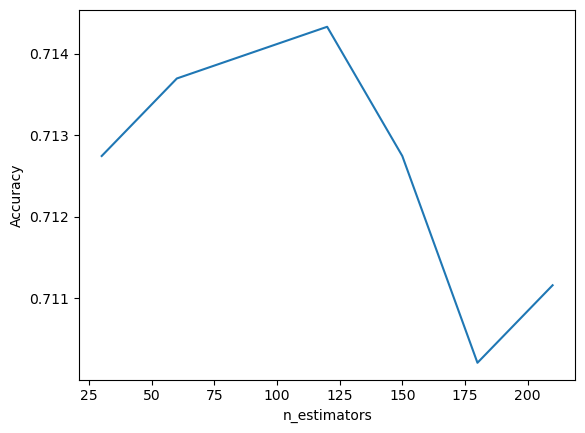

In [108]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(n_estimators_range, accs)
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.show()

In [109]:
bc = BaggingClassifier(base_estimator = dt, random_state=random_state, n_estimators = 100, n_jobs = -1)
# Switch to 100 - lowest complexity, best accuracy

ct = make_column_transformer(
    (ohe, ["category"]),
    (ohe, ["subcategory"]),
    (vect, 'brand'),
    (ohe, ["form"]),
    remainder="passthrough")
bc_pipe = make_pipeline(ct, bc)

bc_pipe.fit(X_train, y_train)
bc_pred = bc_pipe.predict(X_test)
print(accuracy_score(y_test, bc_pred))


scores = cross_val_score(estimator=bc_pipe, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))

0.7136968928344959
[       nan 0.70613108        nan        nan        nan        nan
 0.6987315  0.69661734 0.68393235 0.70190275]
Accuracy = nan +/- nan


In [110]:
#BRAND - MULTICLASS - RANDOM FORESTS

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = random_state)
rf_pipe = make_pipeline(ct, rf)
rf_pipe.fit(X_train, y_train)
rf_pred = rf_pipe.predict(X_test)
accuracy_score(y_test, rf_pred)

0.7324032974001268

In [112]:
cm=confusion_matrix(y_test,rf_pred) 

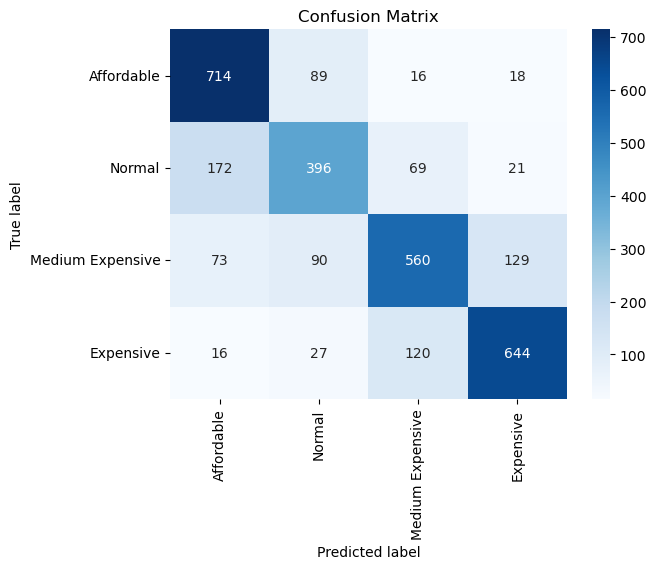

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class labels
class_names = ['Affordable','Normal', 'Medium Expensive', 'Expensive']

# Create heatmap using Seaborn
sns.heatmap(c, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()